In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

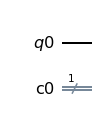

In [2]:
qc.draw('mpl')

In [3]:
from math import pi

In [4]:
# step 1: We need to create a superposition using the Hadamard gate
qc.h(q[0])
# step 2: apply phase gate
qc.p(2*pi, q[0])  # try different values of theta here, such as pi/2, 0, pi/4 

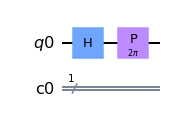

In [5]:
qc.draw('mpl')

In [6]:
from qiskit.quantum_info import Statevector

In [7]:
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

In [8]:
from qiskit.visualization import plot_state_qsphere

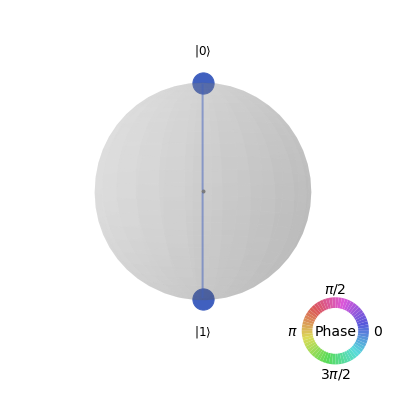

In [9]:
plot_state_qsphere(qc)

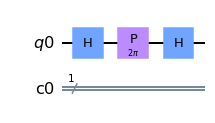

In [10]:
# step 3: apply Hadamard gate again
qc.h(q[0])
qc.draw('mpl')

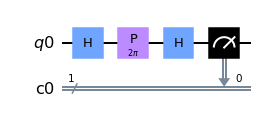

In [11]:
# let's make a measurement
qc.measure(q[0], c[0])
qc.draw('mpl')

{'0': 1024}


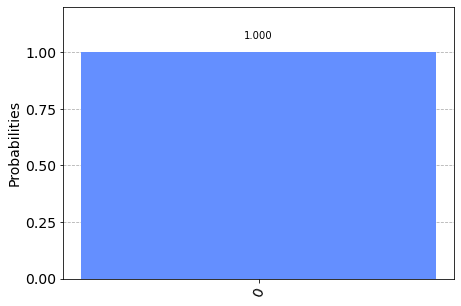

In [12]:
# Run on an ideal quantum computer simulator
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc, backend)  
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)


from qiskit.visualization import plot_histogram
plot_histogram(counts)